In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import re

In [2]:
df = pd.read_csv('clean_resume_data.csv')



In [3]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [4]:
df.isna().sum()

ID          0
Category    0
Feature     1
dtype: int64

In [5]:
#dropping NA because 1 row only . its insignificant
df=df.dropna()
df.isna().sum()

ID          0
Category    0
Feature     0
dtype: int64

Text(0.5, 1.0, 'Distribution of Job Categories')

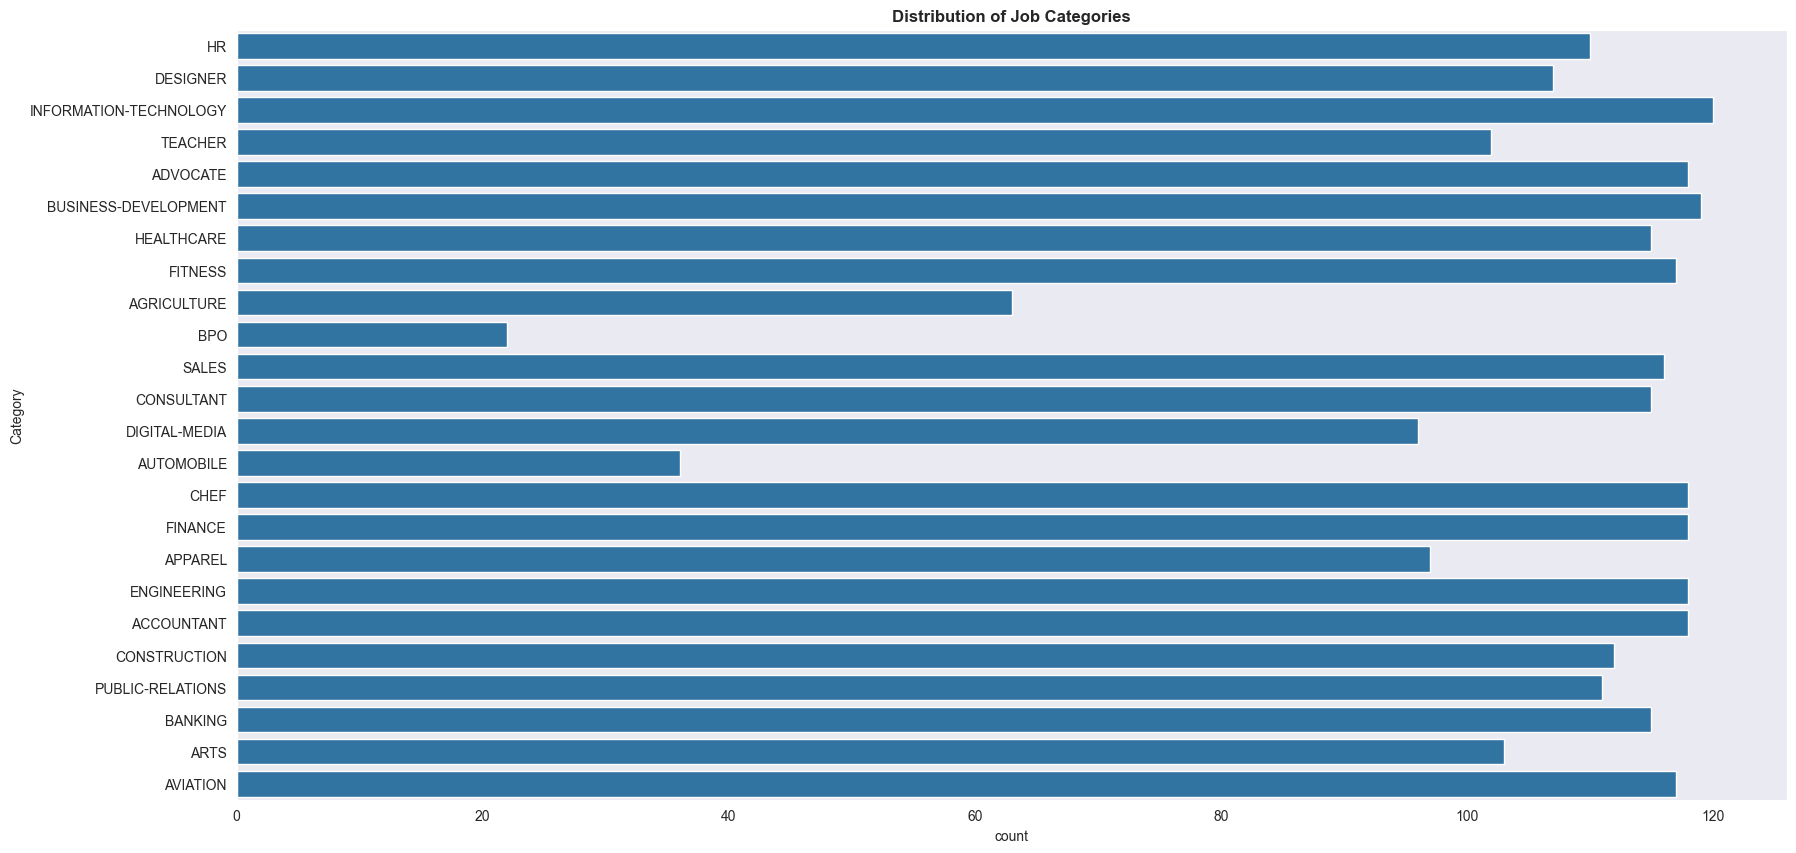

In [6]:
sns.set_style("dark")
sns.color_palette("pastel")
plt.figure(figsize=(20,10))
sns.countplot(df,y='Category')
plt.title('Distribution of Job Categories',weight='bold')


Data Augmentation

In [7]:
df['Category'].value_counts().max()

120

In [8]:
from sklearn.utils import resample
max_count=df['Category'].value_counts().max()
cat_names=df['Category'].unique()
balanced_data=[]

for cat in cat_names:
    cat_data = df.query(f'Category == "{cat}"')
    if len(cat_data) < max_count:
        #perform oversampling for categories with fewer samples: add samples
        balanced_cat = resample(cat_data, replace=True, n_samples=max_count, random_state=20)
    else:
        #peerform undersampling for categories with more samples: remove samples
        balanced_cat = resample(cat_data, replace=False, n_samples=max_count, random_state=20)
    balanced_data.append(balanced_cat)
df=pd.concat(balanced_data)

Text(0.5, 1.0, 'Distribution of Job Categories after data augementation ')

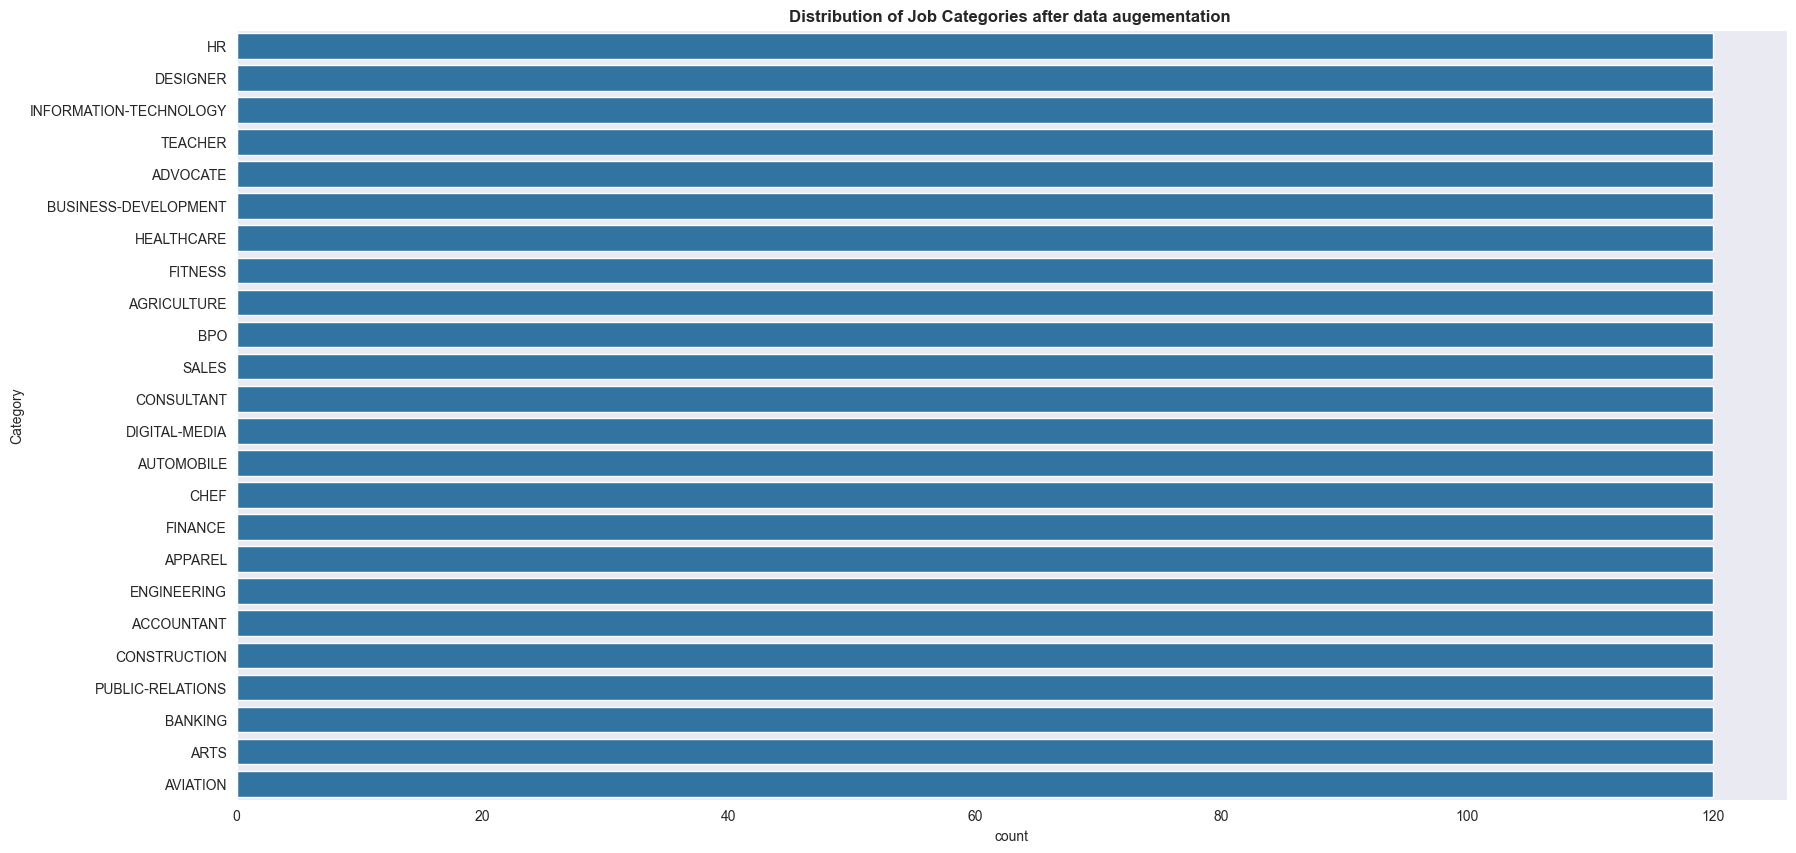

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(df,y='Category')
plt.title('Distribution of Job Categories after data augementation ',weight='bold')


In [10]:
df.head()

,ID,Category,Feature
99,19336728,HR,hr assistant intern summary new graduate seeki...
90,17150707,HR,hr shared services analyst summary versatile h...
15,32977530,HR,hr clerk summary ethical team oriented policy ...
95,28640735,HR,director hr executive profile ambitious human ...
28,18334783,HR,hr director administrator executive profile se...


Model Time!

In [11]:
X=df['Feature']
Y=df['Category']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

In [12]:
"""Here's a brief explanation of the components of TF-IDF:

    Term Frequency (TF): The number of times a term appears in a document. It measures the frequency of a term in the document.
    Inverse Document Frequency (IDF): The logarithmically scaled inverse fraction of the documents that contain the word. It measures how important a term is in the entire corpus."""
vector=TfidfVectorizer()
X_train=vector.fit_transform(X_train)
X_test=vector.transform(X_test)

In [129]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 

clf=RandomForestClassifier()
# one vs all but can specifiy if want softmax
log=LogisticRegression()
#svm is one v one so may take longer
svm=SVC()
clf_cv=cross_val_score(clf,X_train,Y_train,scoring='accuracy',cv=5)
log_cv=cross_val_score(log,X_train,Y_train,scoring='accuracy',cv=5)
svm=cross_val_score(svm,X_train,Y_train,scoring='accuracy',cv=5)

In [130]:
#will take Random Forest
print(f'Accuracy Scores For Random Forest:{clf_cv.mean()}')
print(f'Accuracy Scores For Logistic Regression:{log_cv.mean()}')
print(f'Accuracy Scores For SVM:{svm.mean()}')

Accuracy Scores For Random Forest:0.8407064038479675
Accuracy Scores For Logistic Regression:0.7834216731113836
Accuracy Scores For SVM:0.8272573799867964


Performing random search on random forest

In [137]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': np.random.randint(100, 1000, 100),  # Sample 100 values between 100 and 1000
    'max_depth': np.random.randint(10, 110, 50),        # Sample 50 values between 10 and 110
    'min_samples_split': np.random.randint(2, 20, 20),   # Sample 20 values between 2 and 20
    'min_samples_leaf': np.random.randint(1, 20, 20),    # Sample 20 values between 1 and 20
    'bootstrap': [True, False]
}
random_cv=RandomizedSearchCV(clf,param_dist,scoring='accuracy',cv=5)

random_cv.fit(X_train,Y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 30,  24,  26,  37,  77,  83,  84, 103,  26,  87,  77,  98,  63,
        13, 108,  40,  65,  13,  68,  37,  82,  54,  99,  67,  86,  77,
        71,  21,  17,  87,  49, 104, 101,  38,  96,  38,  79,  85,  39,
        99,  79,  19,  77, 106,  10,  43,  20,  32,  44,  17]),
                                        'min_samples_leaf': array([18, 18,  7,  8,  2, 14,  2, 19,  6,  5,  2, 13, 19,  2, 14,  6, 19,
        6...
       779, 357, 961, 697, 673, 525, 895, 336, 154, 812, 824, 176, 649,
       986, 738, 307, 235, 381, 827, 102, 554, 545, 717, 613, 157, 624,
       186, 818, 484, 398, 104, 674, 882, 709, 561, 293, 633, 723, 343,
       600, 872, 733, 826, 382, 248, 824, 203, 765, 965, 144, 943, 627,
       172, 342, 577, 736, 193, 430, 619, 607, 439, 998, 381, 639, 134,
       302, 526, 152, 793, 572, 569, 735, 579, 424, 591, 676, 194, 795,
       579, 216, 323, 653, 300, 641, 458, 279, 270])},
                   scoring='accuracy')

In [142]:
best_params=random_cv.best_params_
best_score=random_cv.best_score_

print(f'Best Params for Random Forest: {best_params} ')
print(f'Accuracy Score {best_score}')



Best Params for Random Forest: {'n_estimators': 430, 'min_samples_split': 18, 'min_samples_leaf': 2, 'max_depth': 99, 'bootstrap': False} 
Accuracy Score 0.8493888522116382


In [13]:
#running again with best params, as randomsearch takes too long
clf=RandomForestClassifier(430,min_samples_split=18,min_samples_leaf=2,max_depth=99,bootstrap=False)
clf.fit(X_train,Y_train)
predictions=clf.predict(X_test)

In [14]:

accuracy_score(Y_test,predictions)
print(f' Accuracy Score on test set: {accuracy_score(Y_test,predictions)}')

 Accuracy Score on test set: 0.8819444444444444


Prediction System

In [20]:
#https://regex101.com/

def cleanResume(txt):
    #removing links
    cleanText = re.sub('http\S+\s', ' ', txt)
    #removing keywords
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

def predict_category(resume_text):
    resume_text= cleanResume(resume_text)
    resume_tfidf = vector.transform([resume_text])
    #Returns a list, indexing to 0 to make it String
    predicted_category = clf.predict(resume_tfidf)[0]
    return predicted_category

In [18]:
#mock data 
text="""JAMES KING
San Francisco, CA USA
+1.415.555.2468
jking@email.com
www.linkedin.com/in/customurl
SUMMARY
Global Supply Chain Executive experienced in developing and executing global supply
chain strategies for consumer/retail brands while managing multimillion‐dollar
departmental budgets and global staffs of 100+. Recognized as an innovative and
open‐minded leader delivering results in highly dynamic and rapid growth
organizations. Proven change agent having comprehensively reorganized and
integrated supply chain functions at three global companies. Demonstrated success
leading multi‐national teams and creating optimal match of supply and demand during
periods of both high volatility and tremendous growth in the Wholesale, Retail and
E‐com channels. Strong global team builder who is passionate about coaching,
mentoring, collaboration and empowering teams.
* Go‐to‐Market (GTM) Process Optimization & Timeline Reduction
* Sales & Operations Planning (S&OP) Design and Implementation
* Open to Buy (OTB), Procurement and Purchasing, Inventory Optimization
* Expert in consumer goods sourcing, production, planning and costing
* IT Business Process Owner: SAP ERP & APO, JD Edwards, Product Line Management,
Master Data
* APICS / Lean‐Six Sigma Certified
* English native speaker, Russian high intermediate
PROFESSIONAL EXPERIENCE
VICE PRESIDENT GLOBAL SUPPLY CHAIN
Quality Clothes, Co., Redwood City, CA
2017 – 2019
Brief company description.
Promoted to Executive level role responsible for all corporate Global Supply
Planning activities on $2.5B+ in inventory spend ($6.2B Revenue) for multiple
brands with 150+ million units per year, 10,000 colorways, and 170+ suppliers in
30+ countries of origin, from product brief to receipt in distribution center.
* Improved Customer Service every year: Achieved Global Product Fill Rates of 90%
and Service Levels of 96%
* Lead‐Time Innovation: Implemented the company’s first ever Direct Ship Model
(Factory to Customer); established new replenishment capabilities on 50+ million
units
* Increased Employee Engagement scores to the Top Quartile per Gallup’s global
corporate database
Torchiana | www.torchiana.com | 2020
Copyright Torchiana
HEAD OF AMERICAS SUPPLY PLANNING & COE
Quality Clothes, Co, Redwood City, CA
2015 – 2017
Promoted to lead all supply planning activities for all company brands in the
Americas region, and charged with heading a newly created Global Center of
Excellence (COE) for Supply Planning to implement best in class planning processes
and strategies across the Americas, Europe and Asia, Middle East and Africa
purchasing regions.
* Designed and activated the company’s first ever global, centralized and pan‐brand
supply planning organization deemed “best in class” by third party consultants
* Achieved a 30% reduction in global functional head‐count and org costs (SG&A) via
a comprehensive org restructuring and revision of cross functional ways of working
SENIOR DIRECTOR SUPPLY CHAIN
Quality Clothes, Co., Redwood City, CA
2014 – 2015
Recruited to lead Quality’s brand Inventory Planning, Purchasing and Procurement,
Open‐to‐Buy and Turns/DSI Management, and Production/Capacity/Fabric Planning for
the US, Canada, Mexico and Brazil markets.
* Engineered a new cross functional and pan‐brand pre‐season planning process to
reduce vendor loading constraints by 25%, prepare contingency plans for key product
launches, and identify cost savings opportunities
* Spearheaded efforts to define, measure, record, assess and then significantly
shorten global production lead‐times by 45 days on finished goods and 20 days on
raw materials
DIRECTOR SUPPLY PLANNING
Athletic Accessories, Inc., San Francisco, CA
2007 – 2013
Brief company description.
Led all Demand Forecasting, Inventory Planning, Purchasing and Supply Planning
activities for all product categories sold in the US (Footwear, Apparel,
Accessories, Gear and Golf Clubs).
* Implemented a new Open to Buy (OTB) process which managed significant and
volatile inventory risk vs. growth opportunities during the Great Recession of
2008‐2010
Torchiana | www.torchiana.com | 2020
Copyright Torchiana
* Designed and led a new monthly Sales & Operations Planning (S&OP) process which
enhanced executive level collaboration and decision making in support of achieving
both revenue and profitability objectives
HEAD OF GLOBAL SUPPLY PLANNING
The Sports Org, San Francisco, CA
2002 – 2007
Brief company description
Responsible for Supply Planning on 200+ million units per year, 200,000 SKU’s, at
300+ suppliers in 20+ countries of origin, from product brief to receipt in
distribution center. Multi‐branded and global sporting goods categories managed
included Apparel, Accessories and Gear items.
* Proven change agent who led the integration of all planning processes, tools, and
organizational details for both a significant regional/global corporate operations
reorganization and also multiple group brand acquisitions
* Championed the design and implementation of a new global planning system (ILS)
which managed all forecasting, planning, promising and order scheduling activities
* Improved multi‐national and global team effectiveness and efficiency with an
emphasis on diversity, integrity, inclusion and collaboration
OTHER EXPERIENCE
Apparel Sourcing Manager
The Apparel Co.,Seattle, WA
1994 – 2002
Law Clerk
State Department of Justice Civil Enforcement Division, Small town, State
1992 – 1994
EDUCATION
Juris Doctor / Large University – Collegetown, State
Associate Editor Large University Law Review. High Honors Legal Research and
Writing.
Bachelor of Arts, Economics / College – Capital, State
Significant coursework in statistics, mathematics and chemistry."""

In [19]:
print(predict_category(text))

['APPAREL']


In [24]:
#saving model
import pickle


# Saving model to pickle file
with open("models/randomforest_model.pkl", "wb") as file: # file is a variable for storing the newly created file, it can be anything.
    pickle.dump(clf, file) # Dump function is used to write the object into the created file in byte format.
with open("models/vector.pkl", "wb") as file:
    pickle.dump(vector,file)